# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

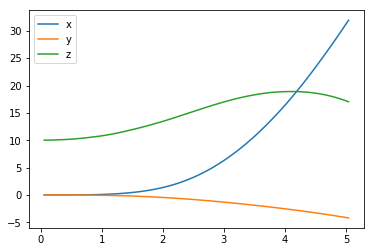

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

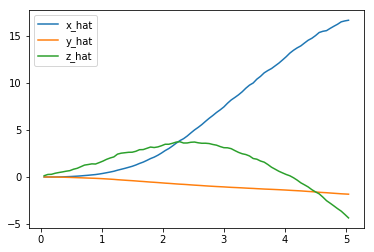

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

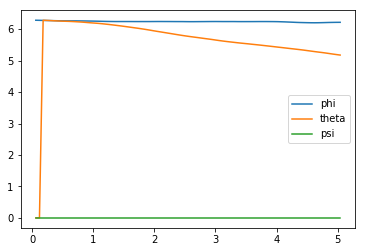

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

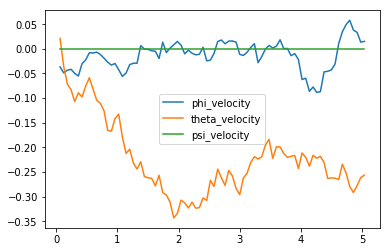

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

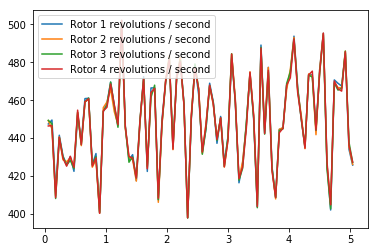

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[31.92829234 -4.19592201 17.02679884  6.21687524  5.1759972   0.        ]
[16.63226885 -1.82519035 -4.34287974]
[ 0.01516588 -0.25631276  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [12]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.235 (best =  -0.029), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [13]:
## TODO: Train your agent here.
import sys
import time
from collections import defaultdict

import pandas as pd

from agents.agent import DDPGAgent
from task import *


def run(agent, task, num_episodes, scores, results, scores_file):
    best_score = -np.Inf
    best_episode = -1
    total_score = 0
    times = []
    
    for episode in range(num_episodes):
        start = time.time()
        score = run_episode(agent, task, results, episode)
        times.append(time.time() - start)
        avg_time = sum(times[-10:]) / min(10, len(times))
        remaining_time = (num_episodes - episode - 1) * avg_time
        
        if score > best_score:
            best_score = score
            best_episode = episode
        scores.append(score)
        scores_file.write('%d\t%.2f\n' % (episode, score))
        total_score += score
        
        # Debug lines
        print("Episode = {:4d}, score = {:7.3f} (avg = {:7.3f}, best = {:7.3f}, episode = {:3d}), avg_time = {:2.0f}, remaining = {:6.2f} minutes".format(
            episode, score, total_score / (episode + 1), best_score, best_episode, avg_time, remaining_time / 60.0
        ))
        sys.stdout.flush()
              
    return scores, results


def run_episode(agent, task, results, episode):
    score = 0.0
    state = agent.reset_episode()
    done = False
    while not done:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
                
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]][episode].append(to_write[ii])
            
    return score

num_episodes = 2000
runtime = 5.
init_pose = [0.0, 0.0, 20.0, 0.0, 0.0, 0.0]

task = HoverTask(init_pose=init_pose, runtime=runtime)
agent = DDPGAgent(task)

scores = []
results = {}
for label in labels:
    results[label] = [[] for _ in range(num_episodes)]
scores_file = open('scores.txt', 'w', 1)

try:
    run(agent, task, num_episodes, scores, results, scores_file)
except KeyboardInterrupt:
    pass

scores_file.close()

Episode =    0, score =  34.106 (avg =  34.106, best =  34.106, episode =   0), avg_time =  3, remaining = 136.28 minutes
Episode =    1, score =  27.574 (avg =  30.840, best =  34.106, episode =   0), avg_time =  2, remaining =  99.15 minutes
Episode =    2, score =  33.233 (avg =  31.637, best =  34.106, episode =   0), avg_time =  2, remaining =  92.67 minutes
Episode =    3, score =  37.038 (avg =  32.988, best =  37.038, episode =   3), avg_time =  2, remaining =  90.25 minutes
Episode =    4, score =  18.575 (avg =  30.105, best =  37.038, episode =   3), avg_time =  2, remaining =  94.34 minutes
Episode =    5, score =  51.479 (avg =  33.667, best =  51.479, episode =   5), avg_time =  2, remaining =  98.04 minutes
Episode =    6, score =  53.341 (avg =  36.478, best =  53.341, episode =   6), avg_time =  2, remaining =  99.84 minutes
Episode =    7, score =  30.638 (avg =  35.748, best =  53.341, episode =   6), avg_time =  2, remaining =  95.35 minutes
Episode =    8, score = 

Episode =   68, score =  30.334 (avg =  28.600, best =  56.783, episode =  33), avg_time =  3, remaining = 126.58 minutes
Episode =   69, score =  30.419 (avg =  28.626, best =  56.783, episode =  33), avg_time =  2, remaining = 118.98 minutes
Episode =   70, score =  30.345 (avg =  28.650, best =  56.783, episode =  33), avg_time =  2, remaining = 109.46 minutes
Episode =   71, score =  30.357 (avg =  28.674, best =  56.783, episode =  33), avg_time =  2, remaining =  97.53 minutes
Episode =   72, score =  30.537 (avg =  28.699, best =  56.783, episode =  33), avg_time =  2, remaining = 102.80 minutes
Episode =   73, score =  30.367 (avg =  28.722, best =  56.783, episode =  33), avg_time =  2, remaining = 100.87 minutes
Episode =   74, score =  30.404 (avg =  28.744, best =  56.783, episode =  33), avg_time =  2, remaining = 100.76 minutes
Episode =   75, score =  30.413 (avg =  28.766, best =  56.783, episode =  33), avg_time =  2, remaining = 101.57 minutes
Episode =   76, score = 

Episode =  136, score =  38.642 (avg =  29.231, best =  56.783, episode =  33), avg_time =  3, remaining = 125.57 minutes
Episode =  137, score =  34.882 (avg =  29.272, best =  56.783, episode =  33), avg_time =  2, remaining = 102.75 minutes
Episode =  138, score =  41.954 (avg =  29.364, best =  56.783, episode =  33), avg_time =  2, remaining = 105.00 minutes
Episode =  139, score =  31.768 (avg =  29.381, best =  56.783, episode =  33), avg_time =  2, remaining = 108.35 minutes
Episode =  140, score =  27.136 (avg =  29.365, best =  56.783, episode =  33), avg_time =  2, remaining = 108.32 minutes
Episode =  141, score =  30.162 (avg =  29.370, best =  56.783, episode =  33), avg_time =  3, remaining = 127.22 minutes
Episode =  142, score =  39.654 (avg =  29.442, best =  56.783, episode =  33), avg_time =  3, remaining = 119.74 minutes
Episode =  143, score =  26.687 (avg =  29.423, best =  56.783, episode =  33), avg_time =  2, remaining = 107.81 minutes
Episode =  144, score = 

Episode =  204, score =  46.217 (avg =  30.730, best =  56.783, episode =  33), avg_time =  2, remaining = 115.09 minutes
Episode =  205, score =  39.214 (avg =  30.771, best =  56.783, episode =  33), avg_time =  2, remaining = 115.46 minutes
Episode =  206, score =  36.229 (avg =  30.797, best =  56.783, episode =  33), avg_time =  2, remaining = 112.41 minutes
Episode =  207, score =  30.238 (avg =  30.795, best =  56.783, episode =  33), avg_time =  2, remaining = 105.01 minutes
Episode =  208, score =  27.406 (avg =  30.779, best =  56.783, episode =  33), avg_time =  2, remaining =  95.72 minutes
Episode =  209, score =  26.177 (avg =  30.757, best =  56.783, episode =  33), avg_time =  2, remaining =  93.08 minutes
Episode =  210, score =  49.777 (avg =  30.847, best =  56.783, episode =  33), avg_time =  2, remaining =  87.32 minutes
Episode =  211, score =  25.659 (avg =  30.822, best =  56.783, episode =  33), avg_time =  2, remaining =  85.77 minutes
Episode =  212, score = 

Episode =  272, score =  30.703 (avg =  31.325, best =  56.783, episode =  33), avg_time =  2, remaining =  91.26 minutes
Episode =  273, score =  30.626 (avg =  31.322, best =  56.783, episode =  33), avg_time =  2, remaining =  90.48 minutes
Episode =  274, score =  31.329 (avg =  31.322, best =  56.783, episode =  33), avg_time =  2, remaining =  89.53 minutes
Episode =  275, score =  30.410 (avg =  31.319, best =  56.783, episode =  33), avg_time =  2, remaining =  85.97 minutes
Episode =  276, score =  30.975 (avg =  31.318, best =  56.783, episode =  33), avg_time =  2, remaining =  86.54 minutes
Episode =  277, score =  30.838 (avg =  31.316, best =  56.783, episode =  33), avg_time =  2, remaining =  87.07 minutes
Episode =  278, score =  30.834 (avg =  31.314, best =  56.783, episode =  33), avg_time =  2, remaining =  87.46 minutes
Episode =  279, score =  30.264 (avg =  31.310, best =  56.783, episode =  33), avg_time =  2, remaining =  88.31 minutes
Episode =  280, score = 

Episode =  340, score =  30.642 (avg =  31.573, best =  56.783, episode =  33), avg_time =  2, remaining =  93.73 minutes
Episode =  341, score =  30.679 (avg =  31.571, best =  56.783, episode =  33), avg_time =  2, remaining =  93.68 minutes
Episode =  342, score =  30.678 (avg =  31.568, best =  56.783, episode =  33), avg_time =  2, remaining =  91.60 minutes
Episode =  343, score =  30.913 (avg =  31.566, best =  56.783, episode =  33), avg_time =  2, remaining =  89.28 minutes
Episode =  344, score =  31.002 (avg =  31.564, best =  56.783, episode =  33), avg_time =  2, remaining =  87.99 minutes
Episode =  345, score =  30.752 (avg =  31.562, best =  56.783, episode =  33), avg_time =  2, remaining =  86.62 minutes
Episode =  346, score =  30.656 (avg =  31.560, best =  56.783, episode =  33), avg_time =  2, remaining =  85.74 minutes
Episode =  347, score =  30.210 (avg =  31.556, best =  56.783, episode =  33), avg_time =  2, remaining =  85.11 minutes
Episode =  348, score = 

Episode =  408, score =  30.808 (avg =  31.431, best =  56.783, episode =  33), avg_time =  4, remaining = 183.28 minutes
Episode =  409, score =  30.688 (avg =  31.429, best =  56.783, episode =  33), avg_time =  4, remaining = 176.68 minutes
Episode =  410, score =  30.927 (avg =  31.428, best =  56.783, episode =  33), avg_time =  4, remaining = 165.06 minutes
Episode =  411, score =  30.387 (avg =  31.425, best =  56.783, episode =  33), avg_time =  4, remaining = 154.18 minutes
Episode =  412, score =  30.748 (avg =  31.424, best =  56.783, episode =  33), avg_time =  3, remaining = 147.10 minutes
Episode =  413, score =  31.163 (avg =  31.423, best =  56.783, episode =  33), avg_time =  3, remaining = 136.14 minutes
Episode =  414, score =  30.788 (avg =  31.421, best =  56.783, episode =  33), avg_time =  3, remaining = 127.79 minutes
Episode =  415, score =  30.879 (avg =  31.420, best =  56.783, episode =  33), avg_time =  3, remaining = 120.01 minutes
Episode =  416, score = 

Episode =  476, score =  41.961 (avg =  32.321, best =  56.783, episode =  33), avg_time =  3, remaining = 126.11 minutes
Episode =  477, score =  42.563 (avg =  32.342, best =  56.783, episode =  33), avg_time =  3, remaining = 126.47 minutes
Episode =  478, score =  43.561 (avg =  32.365, best =  56.783, episode =  33), avg_time =  3, remaining = 126.85 minutes
Episode =  479, score =  42.683 (avg =  32.387, best =  56.783, episode =  33), avg_time =  3, remaining = 129.46 minutes
Episode =  480, score =  42.680 (avg =  32.408, best =  56.783, episode =  33), avg_time =  3, remaining = 130.45 minutes
Episode =  481, score =  43.533 (avg =  32.431, best =  56.783, episode =  33), avg_time =  3, remaining = 131.21 minutes
Episode =  482, score =  42.021 (avg =  32.451, best =  56.783, episode =  33), avg_time =  3, remaining = 131.97 minutes
Episode =  483, score =  41.327 (avg =  32.470, best =  56.783, episode =  33), avg_time =  3, remaining = 131.61 minutes
Episode =  484, score = 

Episode =  544, score =  43.036 (avg =  33.599, best =  56.783, episode =  33), avg_time =  3, remaining = 137.72 minutes
Episode =  545, score =  41.472 (avg =  33.613, best =  56.783, episode =  33), avg_time =  3, remaining = 137.99 minutes
Episode =  546, score =  43.787 (avg =  33.632, best =  56.783, episode =  33), avg_time =  3, remaining = 139.40 minutes
Episode =  547, score =  40.734 (avg =  33.645, best =  56.783, episode =  33), avg_time =  4, remaining = 144.33 minutes
Episode =  548, score =  42.470 (avg =  33.661, best =  56.783, episode =  33), avg_time =  4, remaining = 146.66 minutes
Episode =  549, score =  42.903 (avg =  33.678, best =  56.783, episode =  33), avg_time =  4, remaining = 148.61 minutes
Episode =  550, score =  42.392 (avg =  33.694, best =  56.783, episode =  33), avg_time =  4, remaining = 150.22 minutes
Episode =  551, score =  41.639 (avg =  33.708, best =  56.783, episode =  33), avg_time =  4, remaining = 151.98 minutes
Episode =  552, score = 

Episode =  612, score =  42.641 (avg =  34.564, best =  56.783, episode =  33), avg_time =  4, remaining = 172.76 minutes
Episode =  613, score =  41.001 (avg =  34.575, best =  56.783, episode =  33), avg_time =  4, remaining = 169.18 minutes
Episode =  614, score =  43.132 (avg =  34.589, best =  56.783, episode =  33), avg_time =  4, remaining = 165.09 minutes
Episode =  615, score =  41.323 (avg =  34.599, best =  56.783, episode =  33), avg_time =  4, remaining = 159.65 minutes
Episode =  616, score =  41.155 (avg =  34.610, best =  56.783, episode =  33), avg_time =  4, remaining = 155.15 minutes
Episode =  617, score =  41.564 (avg =  34.621, best =  56.783, episode =  33), avg_time =  4, remaining = 149.95 minutes
Episode =  618, score =  42.722 (avg =  34.634, best =  56.783, episode =  33), avg_time =  3, remaining = 136.41 minutes
Episode =  619, score =  43.847 (avg =  34.649, best =  56.783, episode =  33), avg_time =  3, remaining = 133.20 minutes
Episode =  620, score = 

Episode =  680, score =  42.683 (avg =  35.339, best =  56.783, episode =  33), avg_time =  5, remaining = 191.42 minutes
Episode =  681, score =  41.925 (avg =  35.348, best =  56.783, episode =  33), avg_time =  5, remaining = 193.08 minutes
Episode =  682, score =  43.179 (avg =  35.360, best =  56.783, episode =  33), avg_time =  5, remaining = 193.22 minutes
Episode =  683, score =  43.251 (avg =  35.371, best =  56.783, episode =  33), avg_time =  5, remaining = 193.20 minutes
Episode =  684, score =  42.174 (avg =  35.381, best =  56.783, episode =  33), avg_time =  5, remaining = 189.68 minutes
Episode =  685, score =  43.215 (avg =  35.393, best =  56.783, episode =  33), avg_time =  5, remaining = 184.66 minutes
Episode =  686, score =  40.769 (avg =  35.400, best =  56.783, episode =  33), avg_time =  5, remaining = 180.93 minutes
Episode =  687, score =  41.233 (avg =  35.409, best =  56.783, episode =  33), avg_time =  5, remaining = 180.59 minutes
Episode =  688, score = 

Episode =  748, score =  41.556 (avg =  35.982, best =  56.783, episode =  33), avg_time =  4, remaining = 159.91 minutes
Episode =  749, score =  43.273 (avg =  35.992, best =  56.783, episode =  33), avg_time =  4, remaining = 155.01 minutes
Episode =  750, score =  41.528 (avg =  36.000, best =  56.783, episode =  33), avg_time =  4, remaining = 154.34 minutes
Episode =  751, score =  41.766 (avg =  36.007, best =  56.783, episode =  33), avg_time =  4, remaining = 151.05 minutes
Episode =  752, score =  41.306 (avg =  36.014, best =  56.783, episode =  33), avg_time =  4, remaining = 153.40 minutes
Episode =  753, score =  42.486 (avg =  36.023, best =  56.783, episode =  33), avg_time =  4, remaining = 153.66 minutes
Episode =  754, score =  42.665 (avg =  36.032, best =  56.783, episode =  33), avg_time =  4, remaining = 157.05 minutes
Episode =  755, score =  41.691 (avg =  36.039, best =  56.783, episode =  33), avg_time =  4, remaining = 164.88 minutes
Episode =  756, score = 

Episode =  816, score =  42.622 (avg =  36.528, best =  56.783, episode =  33), avg_time =  6, remaining = 213.51 minutes
Episode =  817, score =  41.315 (avg =  36.533, best =  56.783, episode =  33), avg_time =  6, remaining = 209.44 minutes
Episode =  818, score =  41.960 (avg =  36.540, best =  56.783, episode =  33), avg_time =  6, remaining = 200.17 minutes
Episode =  819, score =  42.245 (avg =  36.547, best =  56.783, episode =  33), avg_time =  5, remaining = 194.55 minutes
Episode =  820, score =  41.783 (avg =  36.553, best =  56.783, episode =  33), avg_time =  5, remaining = 186.37 minutes
Episode =  821, score =  41.926 (avg =  36.560, best =  56.783, episode =  33), avg_time =  5, remaining = 176.58 minutes
Episode =  822, score =  44.419 (avg =  36.569, best =  56.783, episode =  33), avg_time =  5, remaining = 169.97 minutes
Episode =  823, score =  43.773 (avg =  36.578, best =  56.783, episode =  33), avg_time =  4, remaining = 162.77 minutes
Episode =  824, score = 

Episode =  884, score =  42.036 (avg =  36.989, best =  56.783, episode =  33), avg_time =  4, remaining = 128.16 minutes
Episode =  885, score =  42.905 (avg =  36.996, best =  56.783, episode =  33), avg_time =  4, remaining = 127.19 minutes
Episode =  886, score =  43.851 (avg =  37.003, best =  56.783, episode =  33), avg_time =  4, remaining = 129.75 minutes
Episode =  887, score =  41.988 (avg =  37.009, best =  56.783, episode =  33), avg_time =  4, remaining = 132.30 minutes
Episode =  888, score =  42.440 (avg =  37.015, best =  56.783, episode =  33), avg_time =  4, remaining = 136.69 minutes
Episode =  889, score =  43.588 (avg =  37.023, best =  56.783, episode =  33), avg_time =  4, remaining = 138.74 minutes
Episode =  890, score =  42.931 (avg =  37.029, best =  56.783, episode =  33), avg_time =  4, remaining = 142.68 minutes
Episode =  891, score =  42.154 (avg =  37.035, best =  56.783, episode =  33), avg_time =  4, remaining = 146.66 minutes
Episode =  892, score = 

Episode =  952, score =  43.115 (avg =  37.381, best =  56.783, episode =  33), avg_time =  5, remaining = 165.52 minutes
Episode =  953, score =  41.433 (avg =  37.386, best =  56.783, episode =  33), avg_time =  5, remaining = 166.00 minutes
Episode =  954, score =  43.543 (avg =  37.392, best =  56.783, episode =  33), avg_time =  5, remaining = 154.64 minutes
Episode =  955, score =  42.971 (avg =  37.398, best =  56.783, episode =  33), avg_time =  4, remaining = 148.07 minutes
Episode =  956, score =  42.179 (avg =  37.403, best =  56.783, episode =  33), avg_time =  4, remaining = 146.27 minutes
Episode =  957, score =  42.960 (avg =  37.409, best =  56.783, episode =  33), avg_time =  4, remaining = 144.39 minutes
Episode =  958, score =  41.169 (avg =  37.413, best =  56.783, episode =  33), avg_time =  4, remaining = 136.39 minutes
Episode =  959, score =  42.212 (avg =  37.418, best =  56.783, episode =  33), avg_time =  4, remaining = 127.74 minutes
Episode =  960, score = 

Episode = 1020, score =  43.060 (avg =  37.719, best =  56.783, episode =  33), avg_time =  3, remaining = 115.24 minutes
Episode = 1021, score =  43.991 (avg =  37.725, best =  56.783, episode =  33), avg_time =  4, remaining = 116.13 minutes
Episode = 1022, score =  42.964 (avg =  37.731, best =  56.783, episode =  33), avg_time =  4, remaining = 116.69 minutes
Episode = 1023, score =  41.837 (avg =  37.735, best =  56.783, episode =  33), avg_time =  4, remaining = 117.89 minutes
Episode = 1024, score =  42.148 (avg =  37.739, best =  56.783, episode =  33), avg_time =  4, remaining = 117.78 minutes
Episode = 1025, score =  41.277 (avg =  37.742, best =  56.783, episode =  33), avg_time =  4, remaining = 118.09 minutes
Episode = 1026, score =  43.104 (avg =  37.748, best =  56.783, episode =  33), avg_time =  4, remaining = 119.36 minutes
Episode = 1027, score =  42.254 (avg =  37.752, best =  56.783, episode =  33), avg_time =  4, remaining = 120.78 minutes
Episode = 1028, score = 

Episode = 1088, score =  42.272 (avg =  38.018, best =  56.783, episode =  33), avg_time =  5, remaining = 164.98 minutes
Episode = 1089, score =  41.364 (avg =  38.021, best =  56.783, episode =  33), avg_time =  5, remaining = 160.09 minutes
Episode = 1090, score =  42.619 (avg =  38.026, best =  56.783, episode =  33), avg_time =  5, remaining = 158.12 minutes
Episode = 1091, score =  42.550 (avg =  38.030, best =  56.783, episode =  33), avg_time =  5, remaining = 144.17 minutes
Episode = 1092, score =  41.701 (avg =  38.033, best =  56.783, episode =  33), avg_time =  4, remaining = 137.33 minutes
Episode = 1093, score =  40.983 (avg =  38.036, best =  56.783, episode =  33), avg_time =  4, remaining = 133.09 minutes
Episode = 1094, score =  43.560 (avg =  38.041, best =  56.783, episode =  33), avg_time =  4, remaining = 132.09 minutes
Episode = 1095, score =  40.005 (avg =  38.043, best =  56.783, episode =  33), avg_time =  4, remaining = 131.72 minutes
Episode = 1096, score = 

Episode = 1156, score =  42.648 (avg =  38.272, best =  56.783, episode =  33), avg_time =  4, remaining = 134.10 minutes
Episode = 1157, score =  42.243 (avg =  38.276, best =  56.783, episode =  33), avg_time =  4, remaining = 134.24 minutes
Episode = 1158, score =  42.619 (avg =  38.280, best =  56.783, episode =  33), avg_time =  4, remaining = 133.94 minutes
Episode = 1159, score =  40.901 (avg =  38.282, best =  56.783, episode =  33), avg_time =  4, remaining = 132.35 minutes
Episode = 1160, score =  42.365 (avg =  38.285, best =  56.783, episode =  33), avg_time =  4, remaining = 131.56 minutes
Episode = 1161, score =  42.485 (avg =  38.289, best =  56.783, episode =  33), avg_time =  4, remaining = 129.90 minutes
Episode = 1162, score =  42.752 (avg =  38.293, best =  56.783, episode =  33), avg_time =  4, remaining = 124.65 minutes
Episode = 1163, score =  41.329 (avg =  38.295, best =  56.783, episode =  33), avg_time =  4, remaining = 121.57 minutes
Episode = 1164, score = 

Episode = 1224, score =  43.020 (avg =  38.502, best =  56.783, episode =  33), avg_time =  4, remaining = 121.52 minutes
Episode = 1225, score =  41.950 (avg =  38.505, best =  56.783, episode =  33), avg_time =  4, remaining = 121.77 minutes
Episode = 1226, score =  42.206 (avg =  38.508, best =  56.783, episode =  33), avg_time =  4, remaining = 118.91 minutes
Episode = 1227, score =  43.278 (avg =  38.511, best =  56.783, episode =  33), avg_time =  4, remaining = 117.40 minutes
Episode = 1228, score =  43.729 (avg =  38.516, best =  56.783, episode =  33), avg_time =  4, remaining = 115.60 minutes
Episode = 1229, score =  44.445 (avg =  38.521, best =  56.783, episode =  33), avg_time =  4, remaining = 114.75 minutes
Episode = 1230, score =  42.325 (avg =  38.524, best =  56.783, episode =  33), avg_time =  4, remaining = 114.00 minutes
Episode = 1231, score =  44.425 (avg =  38.528, best =  56.783, episode =  33), avg_time =  4, remaining = 112.79 minutes
Episode = 1232, score = 

Episode = 1292, score =  42.945 (avg =  38.715, best =  56.783, episode =  33), avg_time =  4, remaining = 114.47 minutes
Episode = 1293, score =  41.213 (avg =  38.717, best =  56.783, episode =  33), avg_time =  4, remaining = 115.30 minutes
Episode = 1294, score =  41.220 (avg =  38.719, best =  56.783, episode =  33), avg_time =  4, remaining = 117.24 minutes
Episode = 1295, score =  41.265 (avg =  38.721, best =  56.783, episode =  33), avg_time =  4, remaining = 118.59 minutes
Episode = 1296, score =  43.287 (avg =  38.724, best =  56.783, episode =  33), avg_time =  4, remaining = 119.12 minutes
Episode = 1297, score =  43.116 (avg =  38.728, best =  56.783, episode =  33), avg_time =  4, remaining = 119.08 minutes
Episode = 1298, score =  42.283 (avg =  38.731, best =  56.783, episode =  33), avg_time =  4, remaining = 121.17 minutes
Episode = 1299, score =  42.513 (avg =  38.734, best =  56.783, episode =  33), avg_time =  4, remaining = 120.77 minutes
Episode = 1300, score = 

Episode = 1360, score =  42.775 (avg =  38.895, best =  56.783, episode =  33), avg_time =  5, remaining = 148.06 minutes
Episode = 1361, score =  43.210 (avg =  38.899, best =  56.783, episode =  33), avg_time =  5, remaining = 150.10 minutes
Episode = 1362, score =  40.928 (avg =  38.900, best =  56.783, episode =  33), avg_time =  5, remaining = 139.01 minutes
Episode = 1363, score =  40.578 (avg =  38.901, best =  56.783, episode =  33), avg_time =  5, remaining = 141.47 minutes
Episode = 1364, score =  42.049 (avg =  38.904, best =  56.783, episode =  33), avg_time =  5, remaining = 145.39 minutes
Episode = 1365, score =  41.874 (avg =  38.906, best =  56.783, episode =  33), avg_time =  5, remaining = 145.01 minutes
Episode = 1366, score =  39.769 (avg =  38.906, best =  56.783, episode =  33), avg_time =  5, remaining = 147.65 minutes
Episode = 1367, score =  42.975 (avg =  38.909, best =  56.783, episode =  33), avg_time =  6, remaining = 158.07 minutes
Episode = 1368, score = 

Episode = 1428, score =  42.602 (avg =  39.057, best =  56.783, episode =  33), avg_time =  4, remaining = 106.73 minutes
Episode = 1429, score =  41.498 (avg =  39.059, best =  56.783, episode =  33), avg_time =  4, remaining = 111.33 minutes
Episode = 1430, score =  42.958 (avg =  39.062, best =  56.783, episode =  33), avg_time =  4, remaining = 110.08 minutes
Episode = 1431, score =  43.115 (avg =  39.064, best =  56.783, episode =  33), avg_time =  4, remaining = 108.21 minutes
Episode = 1432, score =  43.990 (avg =  39.068, best =  56.783, episode =  33), avg_time =  4, remaining = 108.44 minutes
Episode = 1433, score =  42.733 (avg =  39.070, best =  56.783, episode =  33), avg_time =  4, remaining = 111.44 minutes
Episode = 1434, score =  42.305 (avg =  39.073, best =  56.783, episode =  33), avg_time =  4, remaining = 114.92 minutes
Episode = 1435, score =  43.518 (avg =  39.076, best =  56.783, episode =  33), avg_time =  5, remaining = 120.97 minutes
Episode = 1436, score = 

Episode = 1496, score =  41.995 (avg =  39.217, best =  56.783, episode =  33), avg_time =  5, remaining = 137.26 minutes
Episode = 1497, score =  40.957 (avg =  39.218, best =  56.783, episode =  33), avg_time =  6, remaining = 150.84 minutes
Episode = 1498, score =  43.469 (avg =  39.221, best =  56.783, episode =  33), avg_time =  6, remaining = 162.59 minutes
Episode = 1499, score =  42.809 (avg =  39.223, best =  56.783, episode =  33), avg_time =  7, remaining = 164.39 minutes
Episode = 1500, score =  43.095 (avg =  39.226, best =  56.783, episode =  33), avg_time =  7, remaining = 163.62 minutes
Episode = 1501, score =  42.505 (avg =  39.228, best =  56.783, episode =  33), avg_time =  7, remaining = 166.29 minutes
Episode = 1502, score =  41.593 (avg =  39.229, best =  56.783, episode =  33), avg_time =  7, remaining = 163.02 minutes
Episode = 1503, score =  43.495 (avg =  39.232, best =  56.783, episode =  33), avg_time =  7, remaining = 162.85 minutes
Episode = 1504, score = 

Episode = 1564, score =  43.287 (avg =  39.357, best =  56.783, episode =  33), avg_time =  5, remaining = 118.18 minutes
Episode = 1565, score =  41.711 (avg =  39.358, best =  56.783, episode =  33), avg_time =  5, remaining = 115.94 minutes
Episode = 1566, score =  42.145 (avg =  39.360, best =  56.783, episode =  33), avg_time =  5, remaining = 116.06 minutes
Episode = 1567, score =  43.812 (avg =  39.363, best =  56.783, episode =  33), avg_time =  5, remaining = 116.55 minutes
Episode = 1568, score =  44.190 (avg =  39.366, best =  56.783, episode =  33), avg_time =  5, remaining = 111.84 minutes
Episode = 1569, score =  40.583 (avg =  39.367, best =  56.783, episode =  33), avg_time =  4, remaining =  96.63 minutes
Episode = 1570, score =  41.285 (avg =  39.368, best =  56.783, episode =  33), avg_time =  4, remaining =  93.00 minutes
Episode = 1571, score =  42.515 (avg =  39.370, best =  56.783, episode =  33), avg_time =  4, remaining =  90.64 minutes
Episode = 1572, score = 

Episode = 1632, score =  41.803 (avg =  39.481, best =  56.783, episode =  33), avg_time =  4, remaining =  81.94 minutes
Episode = 1633, score =  41.727 (avg =  39.482, best =  56.783, episode =  33), avg_time =  3, remaining =  79.27 minutes
Episode = 1634, score =  42.508 (avg =  39.484, best =  56.783, episode =  33), avg_time =  3, remaining =  78.00 minutes
Episode = 1635, score =  40.776 (avg =  39.485, best =  56.783, episode =  33), avg_time =  3, remaining =  75.54 minutes
Episode = 1636, score =  42.433 (avg =  39.487, best =  56.783, episode =  33), avg_time =  3, remaining =  74.71 minutes
Episode = 1637, score =  41.230 (avg =  39.488, best =  56.783, episode =  33), avg_time =  3, remaining =  73.65 minutes
Episode = 1638, score =  41.490 (avg =  39.489, best =  56.783, episode =  33), avg_time =  3, remaining =  73.43 minutes
Episode = 1639, score =  42.478 (avg =  39.491, best =  56.783, episode =  33), avg_time =  3, remaining =  74.00 minutes
Episode = 1640, score = 

Episode = 1700, score =  41.132 (avg =  39.605, best =  56.783, episode =  33), avg_time =  8, remaining = 181.03 minutes
Episode = 1701, score =  41.706 (avg =  39.606, best =  56.783, episode =  33), avg_time =  9, remaining = 192.74 minutes
Episode = 1702, score =  43.623 (avg =  39.609, best =  56.783, episode =  33), avg_time =  9, remaining = 194.01 minutes
Episode = 1703, score =  42.848 (avg =  39.610, best =  56.783, episode =  33), avg_time =  9, remaining = 195.60 minutes
Episode = 1704, score =  41.462 (avg =  39.612, best =  56.783, episode =  33), avg_time = 10, remaining = 217.11 minutes
Episode = 1705, score =  44.031 (avg =  39.614, best =  56.783, episode =  33), avg_time = 10, remaining = 213.95 minutes
Episode = 1706, score =  43.286 (avg =  39.616, best =  56.783, episode =  33), avg_time = 10, remaining = 214.13 minutes
Episode = 1707, score =  41.662 (avg =  39.617, best =  56.783, episode =  33), avg_time =  9, remaining = 201.84 minutes
Episode = 1708, score = 

Episode = 1768, score =  42.017 (avg =  39.718, best =  56.783, episode =  33), avg_time =  4, remaining =  82.40 minutes
Episode = 1769, score =  42.943 (avg =  39.720, best =  56.783, episode =  33), avg_time =  4, remaining =  76.52 minutes
Episode = 1770, score =  42.974 (avg =  39.722, best =  56.783, episode =  33), avg_time =  4, remaining =  75.95 minutes
Episode = 1771, score =  42.250 (avg =  39.723, best =  56.783, episode =  33), avg_time =  4, remaining =  75.49 minutes
Episode = 1772, score =  41.193 (avg =  39.724, best =  56.783, episode =  33), avg_time =  4, remaining =  75.39 minutes
Episode = 1773, score =  42.885 (avg =  39.726, best =  56.783, episode =  33), avg_time =  4, remaining =  77.03 minutes
Episode = 1774, score =  41.234 (avg =  39.727, best =  56.783, episode =  33), avg_time =  4, remaining =  77.60 minutes
Episode = 1775, score =  42.801 (avg =  39.728, best =  56.783, episode =  33), avg_time =  4, remaining =  77.86 minutes
Episode = 1776, score = 

Episode = 1836, score =  43.294 (avg =  39.817, best =  56.783, episode =  33), avg_time =  6, remaining = 118.79 minutes
Episode = 1837, score =  42.669 (avg =  39.818, best =  56.783, episode =  33), avg_time =  6, remaining = 108.92 minutes
Episode = 1838, score =  43.380 (avg =  39.820, best =  56.783, episode =  33), avg_time =  5, remaining =  97.59 minutes
Episode = 1839, score =  41.758 (avg =  39.821, best =  56.783, episode =  33), avg_time =  4, remaining =  83.82 minutes
Episode = 1840, score =  42.662 (avg =  39.823, best =  56.783, episode =  33), avg_time =  4, remaining =  78.63 minutes
Episode = 1841, score =  42.637 (avg =  39.824, best =  56.783, episode =  33), avg_time =  4, remaining =  74.95 minutes
Episode = 1842, score =  42.222 (avg =  39.826, best =  56.783, episode =  33), avg_time =  4, remaining =  72.49 minutes
Episode = 1843, score =  42.678 (avg =  39.827, best =  56.783, episode =  33), avg_time =  4, remaining =  70.08 minutes
Episode = 1844, score = 

Episode = 1904, score =  41.567 (avg =  39.913, best =  56.783, episode =  33), avg_time =  3, remaining =  62.00 minutes
Episode = 1905, score =  44.014 (avg =  39.915, best =  56.783, episode =  33), avg_time =  3, remaining =  62.01 minutes
Episode = 1906, score =  41.591 (avg =  39.916, best =  56.783, episode =  33), avg_time =  3, remaining =  61.88 minutes
Episode = 1907, score =  42.120 (avg =  39.918, best =  56.783, episode =  33), avg_time =  3, remaining =  62.01 minutes
Episode = 1908, score =  40.831 (avg =  39.918, best =  56.783, episode =  33), avg_time =  3, remaining =  62.07 minutes
Episode = 1909, score =  42.303 (avg =  39.919, best =  56.783, episode =  33), avg_time =  3, remaining =  61.89 minutes
Episode = 1910, score =  41.301 (avg =  39.920, best =  56.783, episode =  33), avg_time =  3, remaining =  62.39 minutes
Episode = 1911, score =  42.731 (avg =  39.921, best =  56.783, episode =  33), avg_time =  3, remaining =  62.70 minutes
Episode = 1912, score = 

Episode = 1972, score =  40.886 (avg =  39.999, best =  56.783, episode =  33), avg_time =  6, remaining =  99.61 minutes
Episode = 1973, score =  42.860 (avg =  40.000, best =  56.783, episode =  33), avg_time =  6, remaining = 103.86 minutes
Episode = 1974, score =  44.456 (avg =  40.002, best =  56.783, episode =  33), avg_time =  7, remaining = 123.05 minutes
Episode = 1975, score =  43.521 (avg =  40.004, best =  56.783, episode =  33), avg_time =  9, remaining = 146.84 minutes
Episode = 1976, score =  41.609 (avg =  40.005, best =  56.783, episode =  33), avg_time =  9, remaining = 154.61 minutes
Episode = 1977, score =  41.684 (avg =  40.006, best =  56.783, episode =  33), avg_time =  9, remaining = 155.12 minutes
Episode = 1978, score =  42.879 (avg =  40.007, best =  56.783, episode =  33), avg_time =  9, remaining = 156.08 minutes
Episode = 1979, score =  41.422 (avg =  40.008, best =  56.783, episode =  33), avg_time =  9, remaining = 156.96 minutes
Episode = 1980, score = 

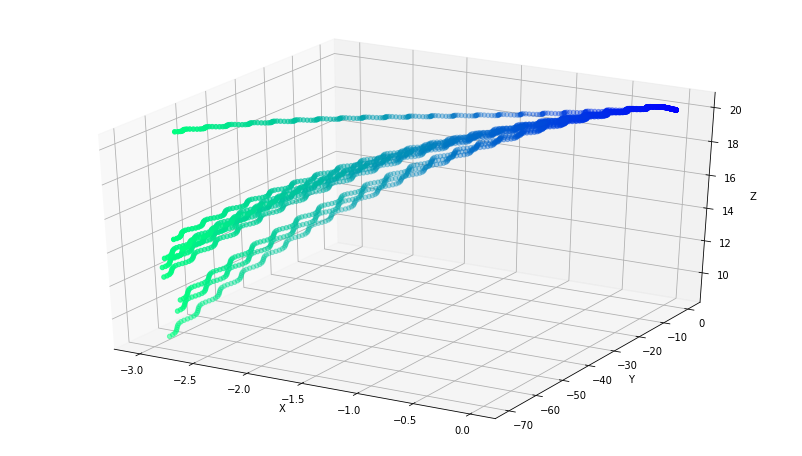

In [41]:
from utils.plot import scatter_3d

episodes = range(len(scores) - 10, len(scores))
scatter_3d(results, episodes)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

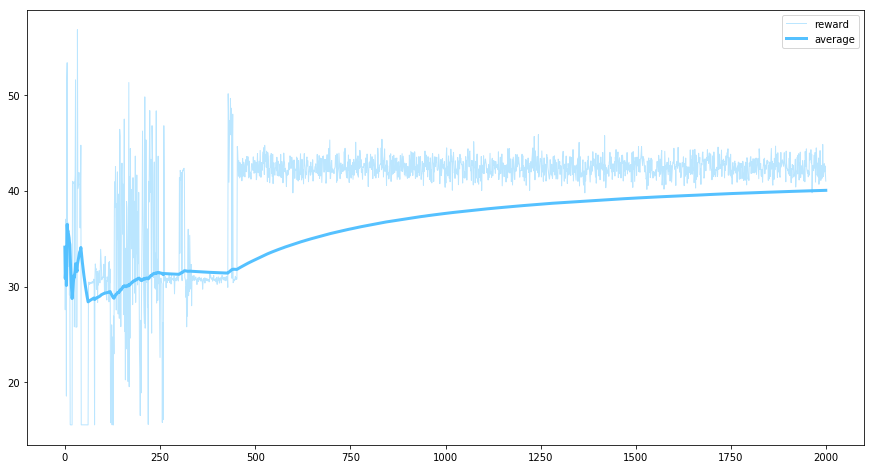

In [33]:
from utils.average import averages

## TODO: Plot the rewards.
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(scores, '#BBE6FF', label='reward', linewidth=1)
plt.plot(averages(scores), '#55C1FF', label='average', linewidth=3)
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

My task is for the drone to hover in place, i.e. try to stay as close as possible to the drone's initial position. I did a lot of experimentation on the state and reward function:

* State = `[x, y, z, x_hat, y_hat, z_hat]`. I tried to include the velocities in the state and penalize high velocities on the reward function, but I did not manage to make the agent learn this way.
* State = `[x, y, z]`. I settled on only including the `x`, `y` and `z` positions in the state, and did experimentation on the reward function for this state.
* I also removed the action repeat, as in my experimentation it did not benefit the learning.

For the state of `[x, y, z]` I tried many iterations of the reward function, I'll describe some of the mejor changes in my design:

* I started with `1 - 0.3 * abs(distance)`, but this quickly penalized distance and didn't prompt learning.
* Then I read a tip in the Studen Hub [1] and I designed a reward function like `min(1, 1 / (1 + abs(distance)))`. The problem with this is that it will keeping giving reward no matter of far the drone is from the initial position.
* I also tried other normalized reward functions: `1. / (1 + np.exp(1.0 * distance - 6.0))` (sigmoid function like) and `1 - (distance / self.max_distance)` [2].
* At the end I decided to use an hyperbolic tangent function to normalize the distance (`1 - np.tanh(distance)`), as it results in a reward function than becomes steeper when the distance decreases, which should help the agent to try to more precisely stay close to the intendend position [2].
* The hyperbolic tangent changes very fast, so I added a factor to reduce the speed at which the rewards lowers respective with the distance: `1 - np.tanh(n * distance)`
* I experimented with this factor, trying values from 0.1 to 1.0, and I settled on 0.3.

---

References:

* [1] Fernando W. for the pointer to normalize the reward function
* [2] https://www.youtube.com/watch?v=0R3PnJEisqk

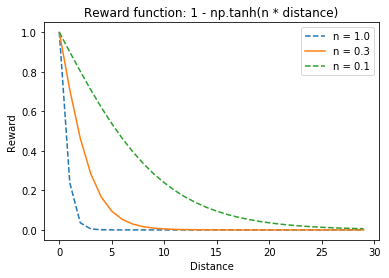

In [42]:
x = list(range(30))
y1 = [1 - np.tanh(distance) for distance in range(30)]
y2 = [1 - np.tanh(.3 * distance) for distance in range(30)]
y3 = [1 - np.tanh(.1 * distance) for distance in range(30)]

plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(x, y1, '--', label='n = 1.0')
plt.plot(x, y2, '-',  label='n = 0.3')
plt.plot(x, y3, '--', label='n = 0.1')
plt.title('Reward function: 1 - np.tanh(n * distance)')
plt.ylabel('Reward')
plt.xlabel('Distance')
plt.legend();

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I used the provided DDPG algorithm and I did some experimentations with the hyperparameters without finding improvements to the agent's learning, seeming to indicate that the given hyperparameters are already good. This was also confirmed by a post in the Knowledge hub [3].

The final hyperparameters are:

* Algorithm:
  * gamma = 0.99
  * tau = 0.01
* Replay memory:
  * buffer size = 100000
  * batch size = 64
* Noise process
  * mu = 0
  * theta = 0.15
  * sigma = 0.20
* Actor and critic Adam optimizer:
  * lr = 0.001

We use neural networks for both the actor and the critic:

* The actor:
  * Input layer with the state size
  * Three densely-connected layers with relu activation functions and sizes 32, 64 and 32, respectively
  * Output layer with sigmoid activation function and with the action size
    
* The critic (has two pathways):
  * States pathway:
    * Input layer with the state size
    * Two densely-connected layers with relu activation functions and sizes 32 and 64, respectively
  * Actions pathway:
    * Input layer with the action size
    * Two densely-connected layers with relu activation functions and sizes 32 and 64, respectively
  * An Add layer to merge the two pathways
  * An relu Activation layer
  * An output layer of size one to produce the Q values

[3] https://knowledge.udacity.com/questions/3128

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

I think that the task was hard to learn, I experimented with a lot of different reward functions and parameter values, but I never managed to make the agent hover in what I would consider an acceptable fashion.

At the beginning the agent seemed to be hard at work at exploring different possibilities before stabilizing into a policy, and finally seemingly having an aha moment and jumping to a better policy, to which it stuck for the remainder of the episodes.

Averarage reward for the last 10 episodes: 42.31


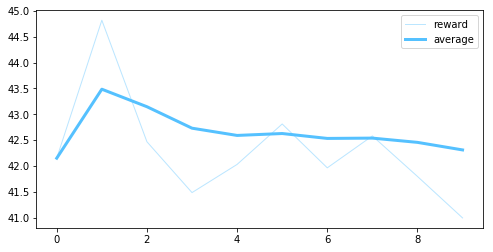

In [39]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.plot(scores[-10:], '#BBE6FF', label='reward', linewidth=1)
plt.plot(averages(scores[-10:]), '#55C1FF', label='average', linewidth=3)
plt.legend()
_ = plt.ylim()

print('Averarage reward for the last 10 episodes: %.2f' % (sum(scores[-10:]) / 10.))

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The hardest part of this project for me was designing the reward function to make the agent learn,  in so far that I did not manage to make the agent learn how to hover correctly. Even though the agent sometimes found a somewhat good policy, it ended up switching to a worse policy and getting stuck with it for the remainder of the episodes. Something that adds to the difficulty on this project is the long time that the agent takes with the DDPG algorithm, taking between 20 and 60 minutes to go through 1,000 episodes.

Something that I found interesting is that the agent seemed to most time lock the motors to either max or min revolutions. Another interesting point is that the agent most of times switched to a worse policy.